In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import precision_score,recall_score, f1_score


# Question 1

## a) Clique of size 4 

### v6, v8, v9, v11

## b) maximal 1-Plex

### v6, v8, v9, v11

## c) maximal 2-Plex (there might be more)

### v6, v7, v8, v9
### v6, v7, v8, v11
### v6, v8, v9, v11
### v8, v9, v11, v12
### v8, v9, v10, v11
### v11, v12, v13, v14

## d) 3-Clique (there might be more)

### v1, v2, v3, v4, v5, v6, v7, v8, v9, v11
### v2, v6, v7, v8, v9, v10, v11, v12, v14
### v6, v7, v8, v9, v10, v11, v12, v13, v14

## e) 2-Clan (there might be more)

### v9, v10, v11, v15
### v1, v2, v3, v4, v5, v6
### v2, v6, v7, v8, v9, v11
### v6, v7, v8, v9, v11, v12
### v8, v11, v12, v13, v14
### v6, v8, v9, v10, v11, v12, v14

## f) 2-Club (there might be more)

### v9, v10, v11, v15
### v1, v2, v3, v4, v5, v6
### v2, v6, v7, v8, v9, v11
### v6, v7, v8, v9, v11, v12
### v8, v11, v12, v13, v14
### v6, v8, v9, v10, v11, v12, v14

## g) 1-Core

### v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15

## h) 2-Core

### v6, v7, v8, v9, v10, v11, v12, v13, v14

## i) 2-Shell

### v7, v10, v12, v13, v14

## j) 4-Truss

### v6, v8, v9, v11

# Question 2

__Step 1__. Find all cliques of size 3. These cliques are $\{v_1,v_2,v_3\}$, $\{v_2,v_3,v_4\}$, $\{v_5,v_6,v_7\}$, $\{v_6,v_7,v_8\}$, $\{v_8,v_9,v_{10}\}$, $\{v_9,v_{10},v_{11}\}$, $\{v_9,v_{10},v_{12}\}$, $\{v_{10},v_{11},v_{12}\}$, $\{v_{9},v_{11},v_{12}\}$. 

__Step 2__. We create a graph where nodes are cliques of size 3 and there is an edge between two cliques (super nodes) if they share 2 nodes. Therefore, the resulting graph is as the following.

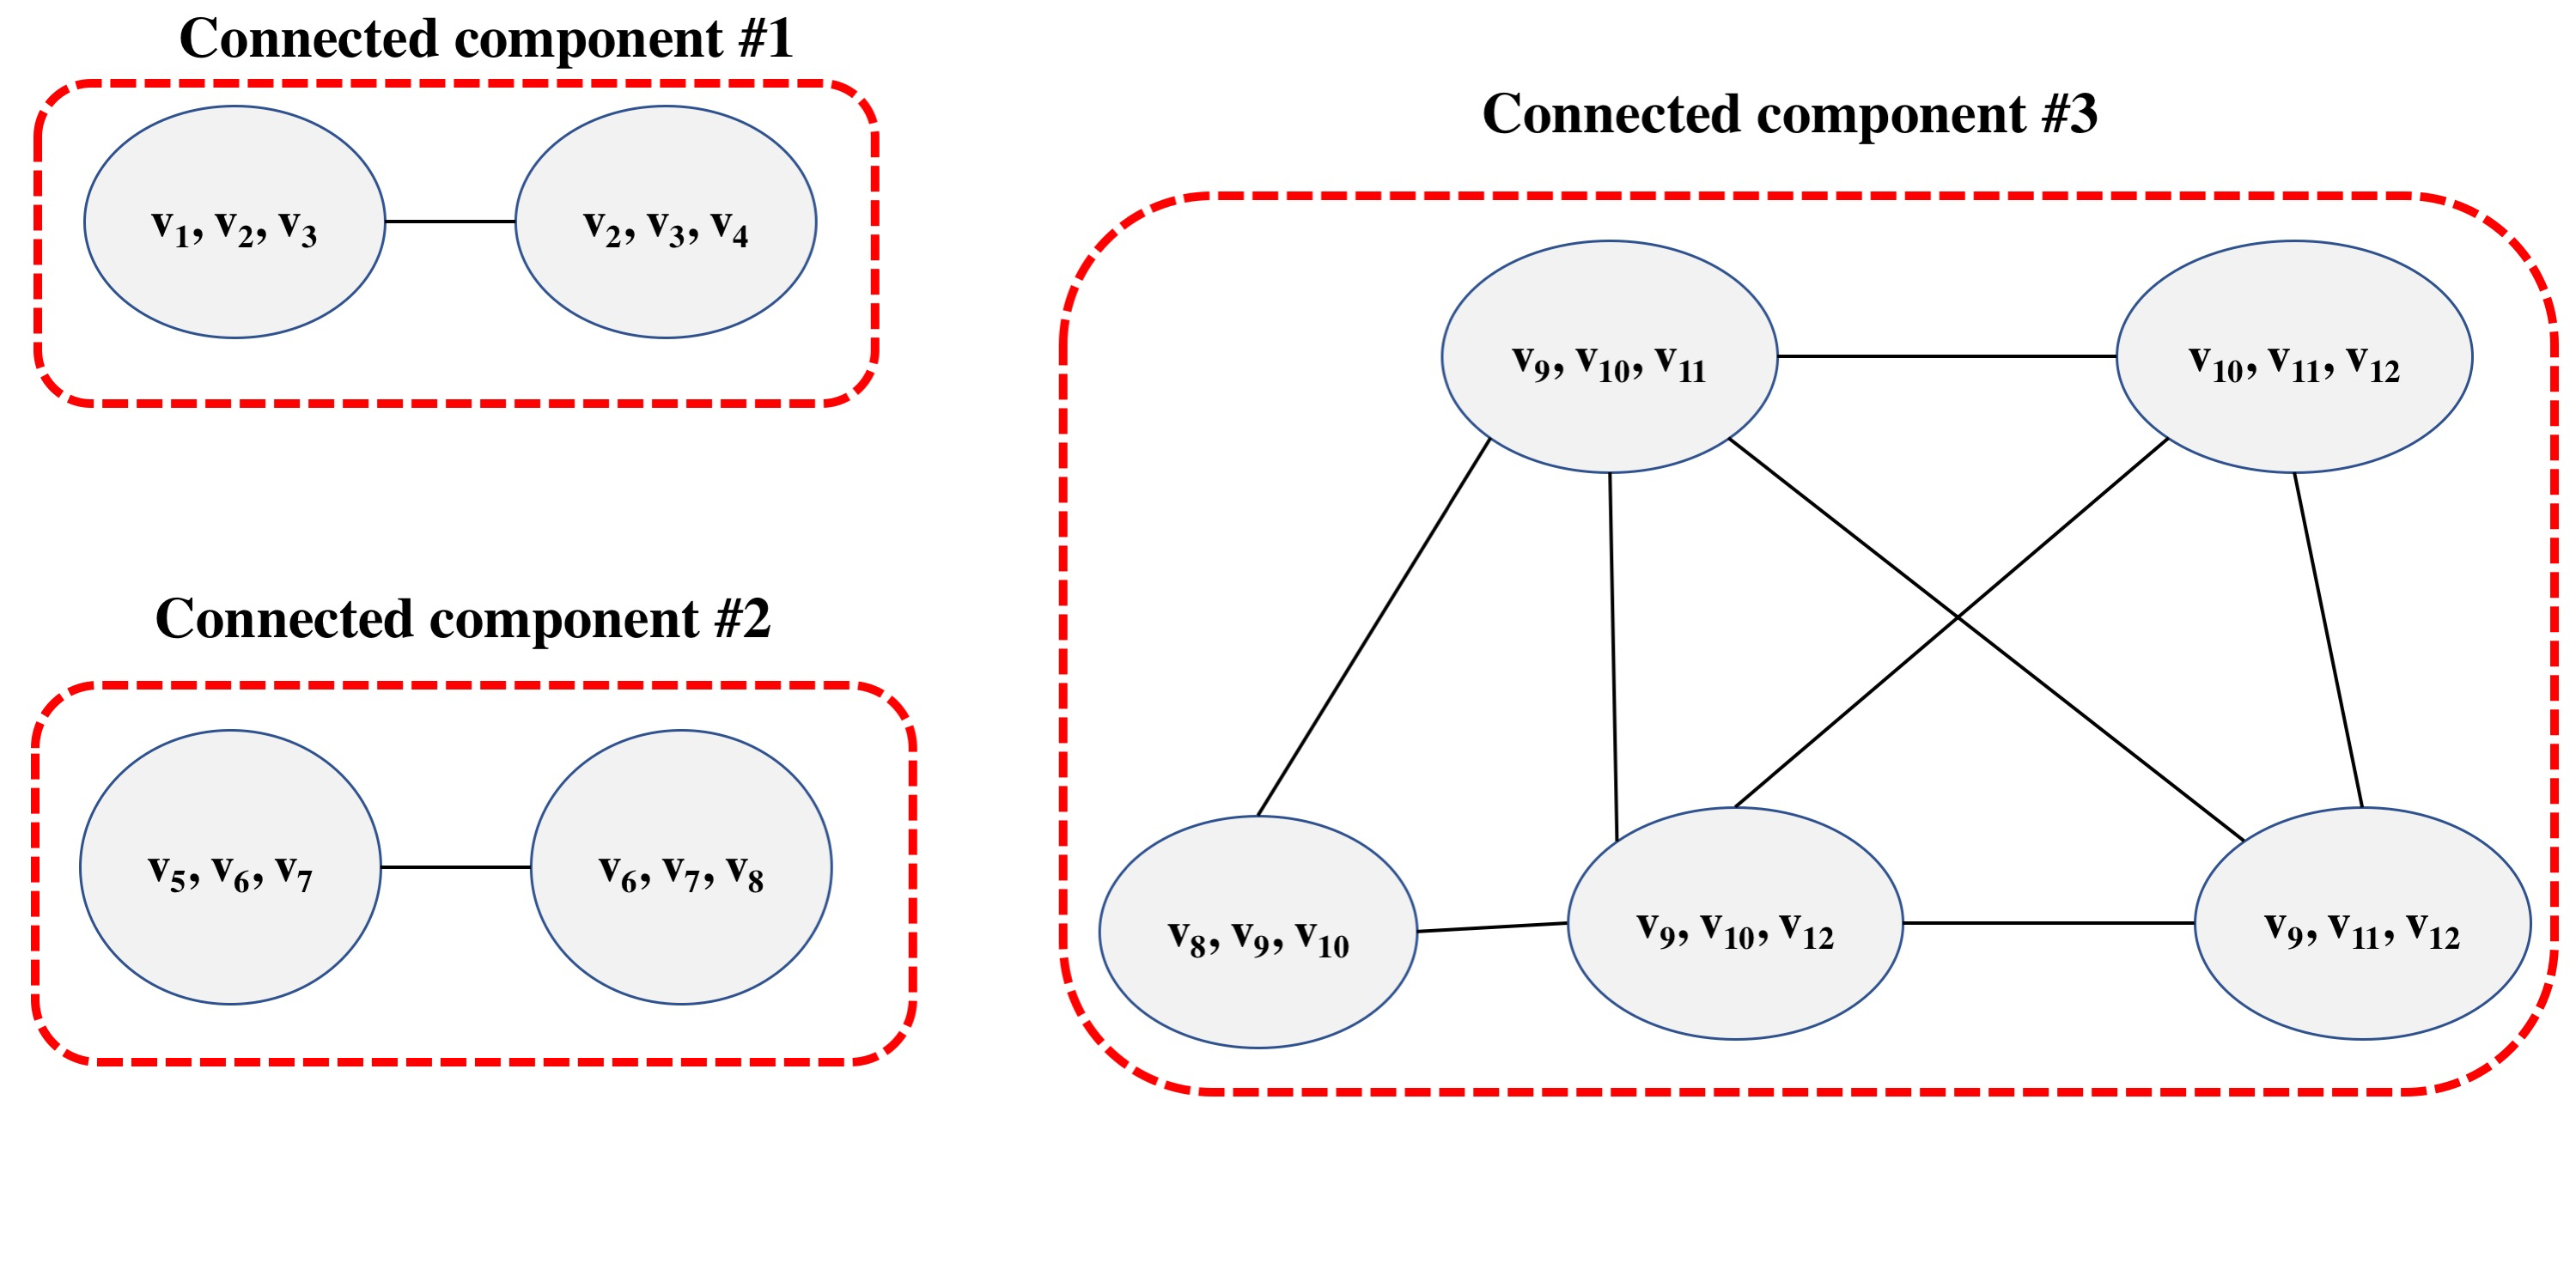

__Step 3__. Nodes in each connected component of the new graph constitutes the nodes of a community. Hence, we have three communities including $\{v_1,v_2,v_3, v_4\}$, $\{v_5,v_6,v_7,v_8\}$, and $\{v_8,v_9,v_{10},v_{11},v_{12}\}$. 

# Question 3

In [104]:
G=nx.karate_club_graph()

In [105]:
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [106]:
labels={}
clubs_labels=dict(G.nodes(data=True))
for k in clubs_labels:
    if clubs_labels[k]['club']=='Mr. Hi':
        labels[k]=0
    else:
        labels[k]=1   
print(labels.values())

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [179]:
def performance_measures(predictions):
    class0_predictions= [a for a in predictions if a[1]==0]
    class1_predictions= [a for a in predictions if a[1]==1]
    l1=[labels[x[0]] for x in class0_predictions]
    l2=[labels[x[0]] for x in class1_predictions]
    predicted_labels_class0= max(l1,key=l1.count)
    predicted_labels_class1= max(l2,key=l2.count)
 
    
    purity=1/len(labels)*(max(l1.count(0),l1.count(1)) + max(l2.count(0),l2.count(1)))

    assigned_labels={}
    for k in class0_predictions:
        assigned_labels[k[0]]=predicted_labels_class0
        
    for k in class1_predictions:
        assigned_labels[k[0]]=predicted_labels_class1
        
    assigned_labels= (dict(sorted(assigned_labels.items())))
    
    y_preds=list(assigned_labels.values())
    y_true=list(labels.values())
    print("Predicted:\t", y_preds)
    print("True:\t\t", y_true)
    NMI=normalized_mutual_info_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds, average="weighted")
    recall=recall_score(y_true,y_preds, average="weighted")
    F1_score=f1_score(y_true,y_preds, average="weighted")
    return round(purity,3), round(NMI,3), round(precision,3), round(recall,3), round(F1_score,3),assigned_labels

In [180]:
def draw_graph(nodes_labels, method_name=""):
    GG=nx.karate_club_graph()
    colors={}
    for n in nodes_labels:
        if nodes_labels[n]==0: #'Mr. Hi'
            colors[n]="green"
        else:
            colors[n]="Orange"
            
    plt.figure(figsize=(20,10))
    ax = plt.gca()
    ax.set_title("Detected communities using {} (Green: 'Mr. Hi', Orange: 'Officer')".format(method_name),size=22)
    pos = nx.spring_layout(GG)
    nx.set_node_attributes(GG,colors,"color") 
    nx.draw_networkx_labels(GG, pos,font_color='black',font_size=16)
    color_map = [GG.nodes[n]['color'] for n in GG] 
    nx.draw(GG,pos, node_color=color_map,node_size=800)
    _ = ax.axis('off')

## a) Spectral Clustering

### Ratio cut

Predicted:	 [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.794 0.411 0.854 0.794 0.785


<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

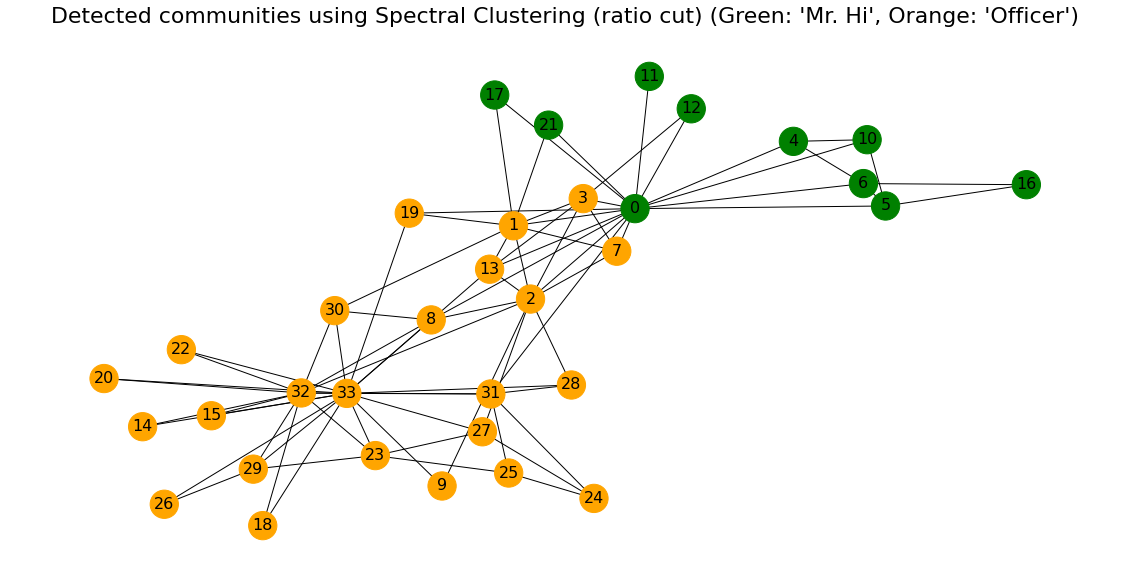

In [181]:
L=nx.laplacian_matrix(G, weight=None)
L=L.todense()
eigenvalues, eigenvectors = LA.eig(L)
eigenvectors=np.array(eigenvectors)
X=list(zip(eigenvalues,eigenvectors.T))
X=sorted(X,key=lambda x: x[0])
data=np.stack([X[0][1],X[1][1]],axis=1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(data.real)
spectral_predictions_ratio_cut= list(zip(G.nodes,kmeans.labels_))
purity_src, NMI_src, precision_src, recall_src, F1_score_src, assigned_labels=performance_measures(spectral_predictions_ratio_cut)
draw_graph(assigned_labels, method_name="Spectral Clustering (ratio cut)")
print(purity_src, NMI_src, precision_src, recall_src, F1_score_src)
kmeans.labels_

### Normalized cut 

Predicted:	 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.941 0.732 0.947 0.941 0.941


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


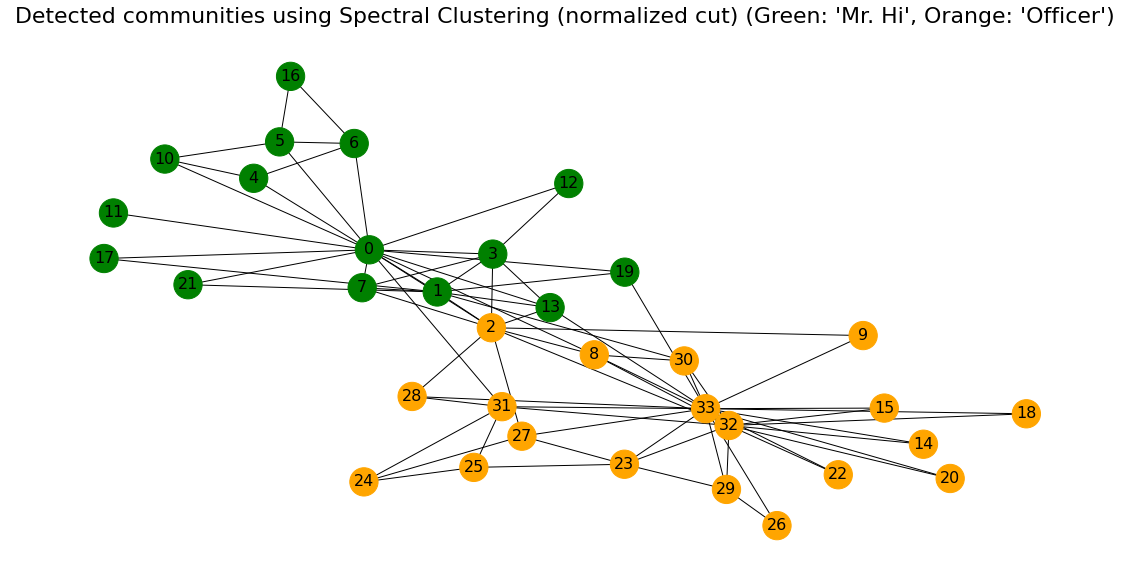

In [182]:
L=nx.normalized_laplacian_matrix(G, weight=None)
L=L.todense()
eigenvalues, eigenvectors = LA.eig(L)
eigenvectors=np.array(eigenvectors)
X=list(zip(eigenvalues,eigenvectors.T))
X=sorted(X,key=lambda x: x[0])
data=np.stack([X[0][1],X[1][1]],axis=1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(data.real)
kmeans.labels_
spectral_predictions_norm_cut= list(zip(G.nodes,kmeans.labels_))
purity_snc, NMI_snc, precision_snc, recall_snc, F1_score_snc,assigned_labels=performance_measures(spectral_predictions_norm_cut)
draw_graph(assigned_labels,method_name="Spectral Clustering (normalized cut)")
print(purity_snc, NMI_snc, precision_snc, recall_snc, F1_score_snc)

## b) Modularity Maximization

Predicted:	 [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.676 0.244 0.804 0.676 0.639


C:\Users\davgu\AppData\Local\Temp/ipykernel_15312/2789144785.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(G)


array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

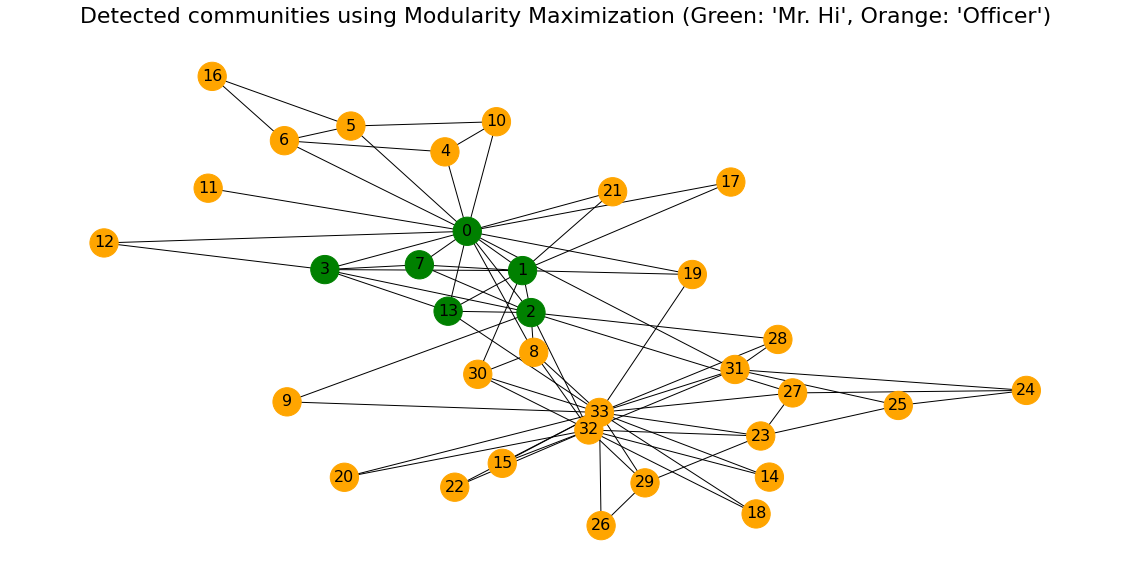

In [183]:
G=nx.karate_club_graph()
A=nx.adjacency_matrix(G)
A=A.todense()
d=np.array(list(dict(G.degree).values()))
d=d.reshape((34,1))
ddt=np.matmul(d,d.T)/(2*len(G.edges))
B=A-ddt
eigenvalues, eigenvectors = LA.eig(B)
eigenvectors=np.array(eigenvectors)
X=list(zip(eigenvalues,eigenvectors.T))
X=[a for a in X if a[0]>0] # Remeber in modularity, the top 𝑘 eigenvalues have to be positive!
X=sorted(X,key=lambda x: x[0],reverse=True) # top k 
data=np.stack([X[0][1],X[1][1]],axis=1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(data.real)
modularity_maximization_predictions= list(zip(G.nodes,kmeans.labels_))
purity_mm, NMI_mm, precision_mm, recall_mm, F1_score_mm,assigned_labels=performance_measures(modularity_maximization_predictions)
draw_graph(assigned_labels,method_name="Modularity Maximization")
print(purity_mm, NMI_mm, precision_mm, recall_mm, F1_score_mm)
kmeans.labels_

## c) Girvan-Newman

Step 1 Edge (0, 31) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


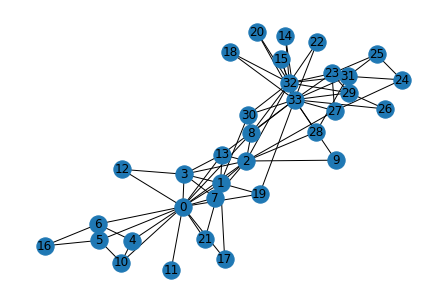

****************************************************************************************************
Step 2 Edge (0, 2) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


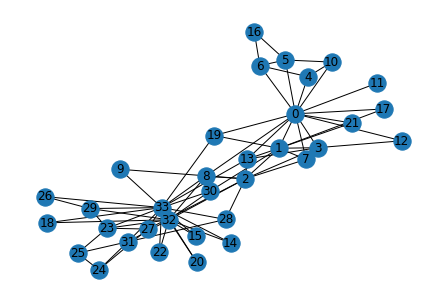

****************************************************************************************************
Step 3 Edge (0, 8) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


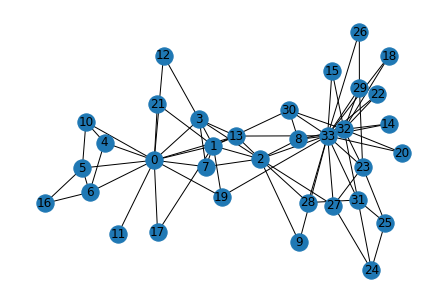

****************************************************************************************************
Step 4 Edge (13, 33) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


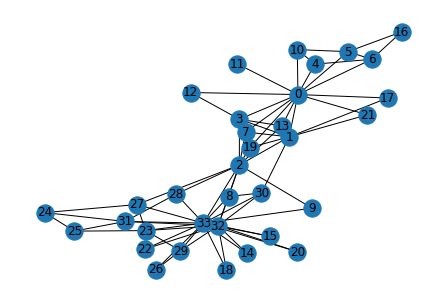

****************************************************************************************************
Step 5 Edge (19, 33) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


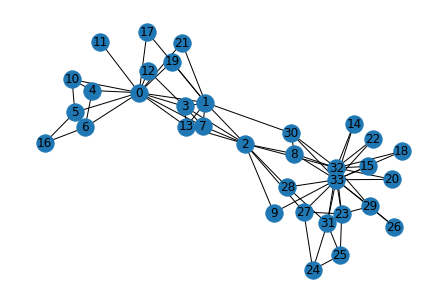

****************************************************************************************************
Step 6 Edge (2, 32) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


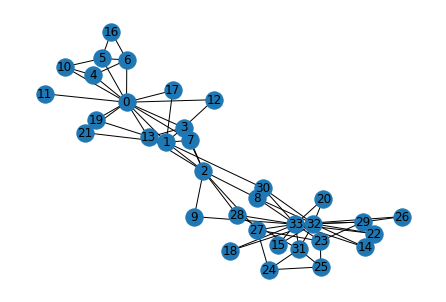

****************************************************************************************************
Step 7 Edge (1, 30) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


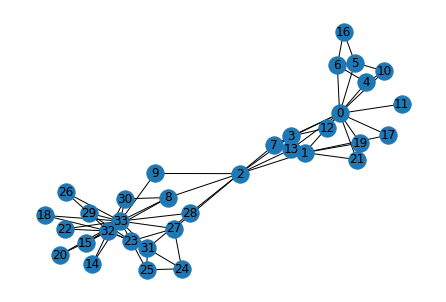

****************************************************************************************************
Step 8 Edge (1, 2) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


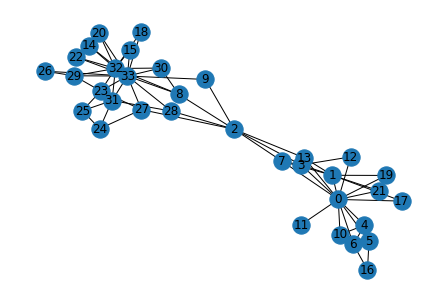

****************************************************************************************************
Step 9 Edge (2, 3) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


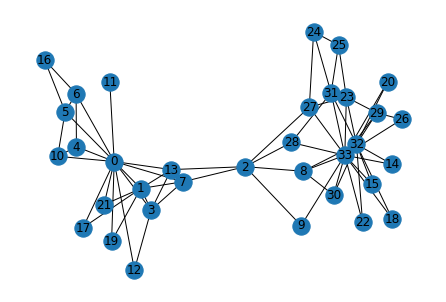

****************************************************************************************************
Step 10 Edge (2, 7) is removed 
Community (0) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


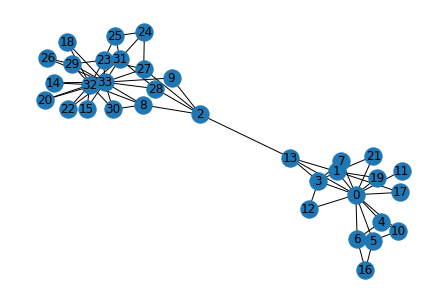

****************************************************************************************************
Step 11 Edge (2, 13) is removed 
Community (0) {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
Community (1) {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


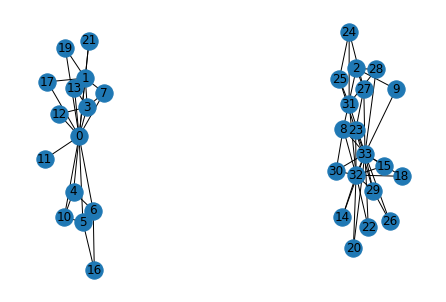

****************************************************************************************************


In [184]:
GG=nx.karate_club_graph()

step=1
while True: 
    B=nx.edge_betweenness(GG)
    e=max(B, key=lambda k: float(B[k]))
    GG.remove_edge(e[0], e[1])
    CCs= list(nx.connected_components(GG))
    print("Step {} Edge {} is removed ".format(step, e))
    for i,cc in enumerate(CCs):
        print("Community ({}) {}".format(i,cc))
    step+=1
    nx.draw(GG, with_labels=True)
    plt.show()
    
    print('*'*100)  
    if len(CCs)==2: # You can change this to if len(G.nodes)==0 to go all the way to a single node as a community 
        break

In [185]:
CCs

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

Predicted:	 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.941 0.732 0.947 0.941 0.941


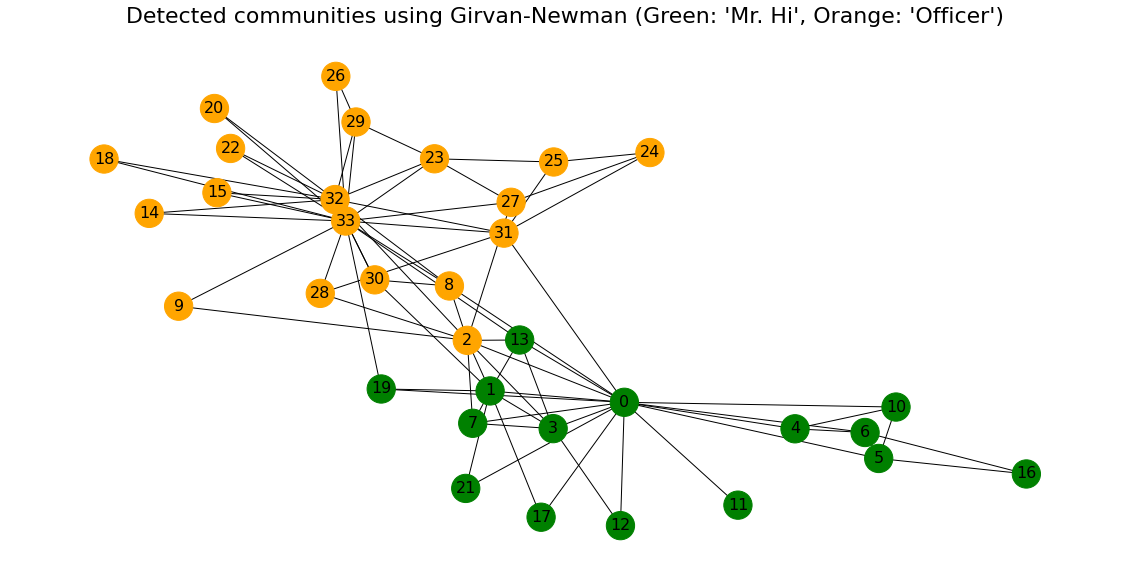

In [186]:
girvan_newman_predictions=[]
for l in labels:
    if l in CCs[0]:
        girvan_newman_predictions.append((l,0))
    else:
        girvan_newman_predictions.append((l,1))
purity_gn, NMI_gn, precision_gn, recall_gn, F1_score_gn,assigned_labels=performance_measures(girvan_newman_predictions)
draw_graph(assigned_labels,method_name="Girvan-Newman")
print(purity_gn, NMI_gn, precision_gn, recall_gn, F1_score_gn)

## d) Node Similarity

In [187]:
def jaccard_sim(G, node1, node2):
    node1_neighbors=set(dict(G[node1]).keys())
    node2_neighbors=set(dict(G[node2]).keys())
    common_neighbors=node1_neighbors.intersection(node2_neighbors)
    all_neighbors=node1_neighbors.union(node2_neighbors)
    return len(common_neighbors)/len(all_neighbors)

def cosine_sim(G, node1, node2):
    node1_neighbors=set(dict(G[node1]).keys())
    if len(node1_neighbors)==0:
        return 0
    node2_neighbors=set(dict(G[node2]).keys())
    if len(node2_neighbors)==0:
        return 0
    common_neighbors=node1_neighbors.intersection(node2_neighbors)
    return len(common_neighbors)/(np.sqrt(len(node1_neighbors))*np.sqrt(len(node2_neighbors)))

In [188]:
cosine_sim_matrix=[]
jaccard_sim_matrix=[]
for n1 in G.nodes:
    for n2 in G.nodes:
        cosine_sim_matrix.append(cosine_sim(G,n1,n2))
        jaccard_sim_matrix.append(jaccard_sim(G,n1,n2))
cosine_sim_matrix=1-np.array(cosine_sim_matrix).reshape((len(G.nodes),len(G.nodes)))
jaccard_sim_matrix=1-np.array(jaccard_sim_matrix).reshape((len(G.nodes),len(G.nodes)))

Predicted:	 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.971 0.837 0.972 0.971 0.971


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

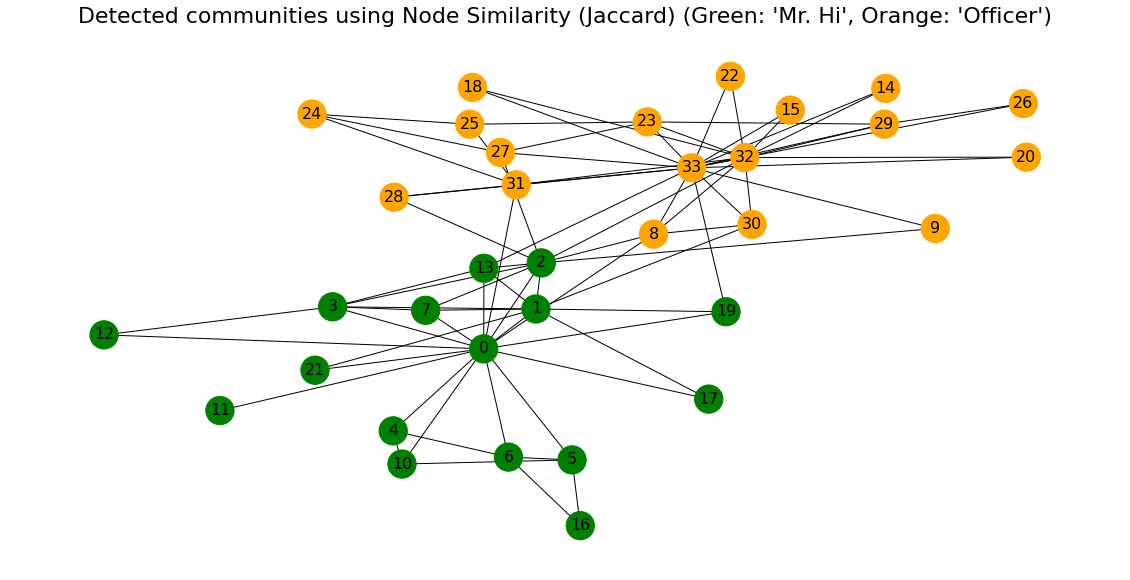

In [189]:
cls=AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average').fit(jaccard_sim_matrix)
jaccard_predictions= list(zip(G.nodes,cls.labels_))
purity_jaccard, NMI_jaccard, precision_jaccard, recall_jaccard, F1_score_jaccard,assigned_labels=performance_measures(jaccard_predictions)
draw_graph(assigned_labels, method_name="Node Similarity (Jaccard)")
print(purity_jaccard, NMI_jaccard, precision_jaccard, recall_jaccard, F1_score_jaccard)
cls.labels_

Predicted:	 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
True:		 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.971 0.837 0.972 0.971 0.971


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

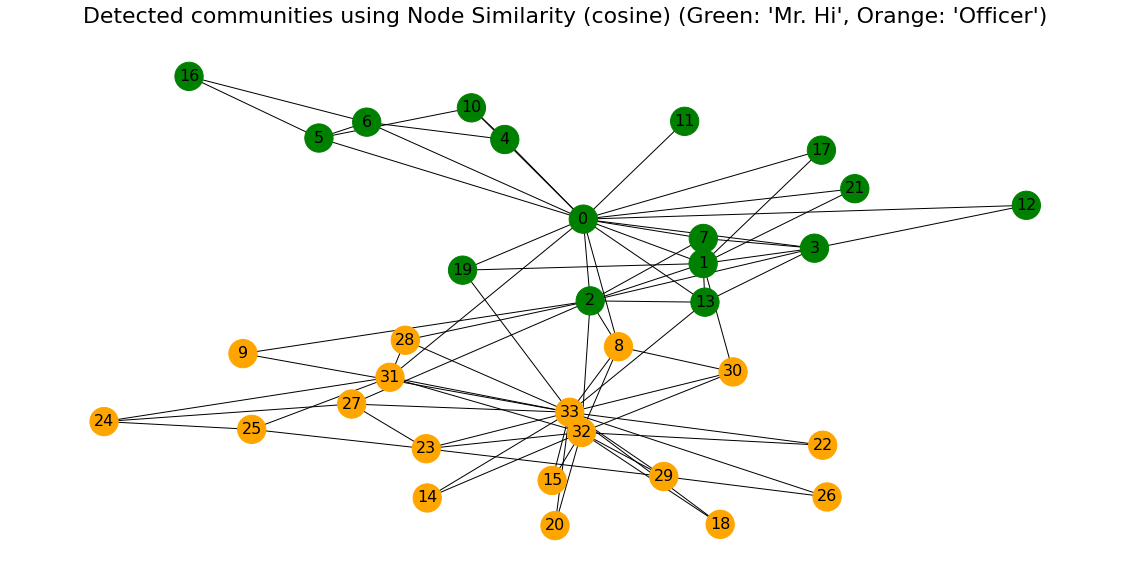

In [190]:
cls=AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average').fit(cosine_sim_matrix)
cosine_predictions= list(zip(G.nodes,cls.labels_))
purity_cosine, NMI_cosine, precision_cosine, recall_cosine, F1_score_cosine,assigned_labels=performance_measures(cosine_predictions)
draw_graph(assigned_labels,method_name="Node Similarity (cosine)")
print(purity_cosine, NMI_cosine, precision_cosine, recall_cosine, F1_score_cosine)
cls.labels_

Performance of community detection algorithms on Zachary’s karate club

## Weighted - PRF average="weighted"

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.971 | 0.837 | 0.972 | 0.971 | 0.971
Spectral Clustering (normalized cut) | 0.971 | 0.837 | 0.972 | 0.971 | 0.971
Modularity Maximization | 0.676 | 0.244 | 0.804 | 0.676 | 0.639
Girvan-Newman | 0.941 | 0.732 | 0.947 | 0.941 | 0.941
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 0.9722 | 0.9706 | 0.9706
Node Similarity (cosine)| 0.9706 | 0.8372 | 0.9722 | 0.9706 | 0.9706

## Weighted - PRF average="binary", Mr. Hi = 0

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.971 | 0.837 | 0.944 | 1.0 | 0.971
Spectral Clustering (normalized cut) | 0.971 | 0.837 | 0.944 | 1.0 | 0.971
Modularity Maximization | 0.676 | 0.244 | 0.607 | 1.0 | 0.756
Girvan-Newman | 0.941 | 0.732 | 0.895 | 1.0 | 0.944
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 0.944 | 1.0 | 0.971
Node Similarity (cosine)| 0.9706 | 0.8372 | 0.944 | 1.0 | 0.971

## Weighted - PRF average="binary", Officer = 0

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.971 | 0.837 | 1.0 | 0.941 | 0.97
Spectral Clustering (normalized cut) | 0.971 | 0.837 | 1.0 | 0.941 | 0.97
Modularity Maximization | 0.676 | 0.244 | 1.0 | 0.353 | 0.522
Girvan-Newman | 0.941 | 0.732 | 1.0 | 0.882 | 0.938
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 1.0 | 0.941 | 0.97
Node Similarity (cosine)| 0.9706 | 0.8372 | 1.0 | 0.941 | 0.97

## Unweighted - PRF average="weighted"

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.794 | 0.411 | 0.854 | 0.794 | 0.785
Spectral Clustering (normalized cut)  |0.941 | 0.732 | 0.947 | 0.941 | 0.941
Modularity Maximization | 0.676 | 0.244 | 0.804 | 0.676 | 0.639
Girvan-Newman | 0.941 | 0.732 | 0.947 | 0.941 | 0.941
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 0.9722 | 0.9706 | 0.9706
Node Similarity (cosine)| 0.9706 | 0.8372 | 0.9722 | 0.9706 | 0.9706

## Unweighted - PRF average="binary", Mr. Hi = 0

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.794 | 0.411 | 0.708 | 1.0 | 0.829
Spectral Clustering (normalized cut)  |0.941 | 0.732 | 0.895 | 1.0 | 0.944
Modularity Maximization | 0.676 | 0.244 | 0.607 | 1.0 | 0.756
Girvan-Newman | 0.941 | 0.732 | 0.895 | 1.0 | 0.944
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 0.944 | 1.0 | 0.971
Node Similarity (cosine)| 0.9706 | 0.8372 | 0.944 | 1.0 | 0.971

## Unweighted - PRF average="binary", Officer = 0

| Algorithm \ Measure| Purity | NMI | Precision | Recall | F1-score |
|---| --- | --- | --- | --- | ---|
Spectral Clustering (ratio cut) | 0.794 | 0.411 | 1.0 | 0.588 | 0.741
Spectral Clustering (normalized cut)  |0.941 | 0.732 | 1.0 | 0.882 | 0.938
Modularity Maximization | 0.676 | 0.244 | 1.0 | 0.353 | 0.522
Girvan-Newman | 0.941 | 0.732 | 1.0 | 0.882 | 0.938
Node Similarity (Jaccard) | 0.9706 | 0.8372 | 1.0 | 0.941 | 0.97
Node Similarity (cosine)| 0.9706 | 0.8372 | 1.0 | 0.941 | 0.97

Most algorithms, except modularity maximization, performs well in predicting the communities. Note that modularity maximization is based on comparing the observed neighborhood between two nodes with that of a randomly generated graph. Hence, given this approach's statistical nature, the graph's size should be large enough. However,  Zachary's karate club contains only 34 nodes and 78 edges. 